# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
import calendar
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

# Reservoir Level

In [2]:
reservoir = pd.read_csv('reservoir_data/san-antonio_reservoir_data.csv')
reservoir.head()

reservoir.date = pd.to_datetime(reservoir.date)

# mmscaler = MinMaxScaler(feature_range=(0, 1))
# mmscaler.fit(reservoir[['reservoir_storage']])
# reservoir.reservoir_storage = mmscaler.transform(reservoir[['reservoir_storage']])

reservoir = reservoir.set_index('date')
reservoir.head()

reservoir_agg = reservoir.reservoir_storage.resample('M').agg('mean')

reservoir_agg.head()

date
1997-08-31    301752.217391
1997-09-30    290600.833333
1997-10-31    282507.709677
1997-11-30    277624.300000
1997-12-31    275259.387097
Freq: M, Name: reservoir_storage, dtype: float64

##### Changing from series to a dataframe.

In [3]:
reservoir_agg = reservoir_agg.to_frame()

In [4]:
reservoir_agg.head()

,reservoir_storage
date,
1997-08-31,301752.217391
1997-09-30,290600.833333
1997-10-31,282507.709677
1997-11-30,277624.300000
1997-12-31,275259.387097


##### Mean and standard deviation

In [5]:
reservoir_mean = reservoir_agg.reservoir_storage.mean()
print(f'The monthly average for reservoir levels is: {reservoir_mean:.4f}')
reservoir_stdev = reservoir_agg.reservoir_storage.std()
print(f'The standard deviation for monthly reservoir levels is: {reservoir_stdev:.4f}')

The monthly average for reservoir levels is: 171270.4122
The standard deviation for monthly reservoir levels is: 84626.9124


##### Creating a column for min max scaled values

In [6]:
mmscaler = MinMaxScaler(feature_range=(0, 1))
mmscaler.fit(reservoir_agg[['reservoir_storage']])
reservoir_agg['scaled_reservoir_storage'] = mmscaler.transform(reservoir_agg[['reservoir_storage']])
reservoir_agg.head()

,reservoir_storage,scaled_reservoir_storage
date,,
1997-08-31,301752.217391,1.000000
1997-09-30,290600.833333,0.962086
1997-10-31,282507.709677,0.934570
1997-11-30,277624.300000,0.917967
1997-12-31,275259.387097,0.909926


##### Plotting Revervoir Level

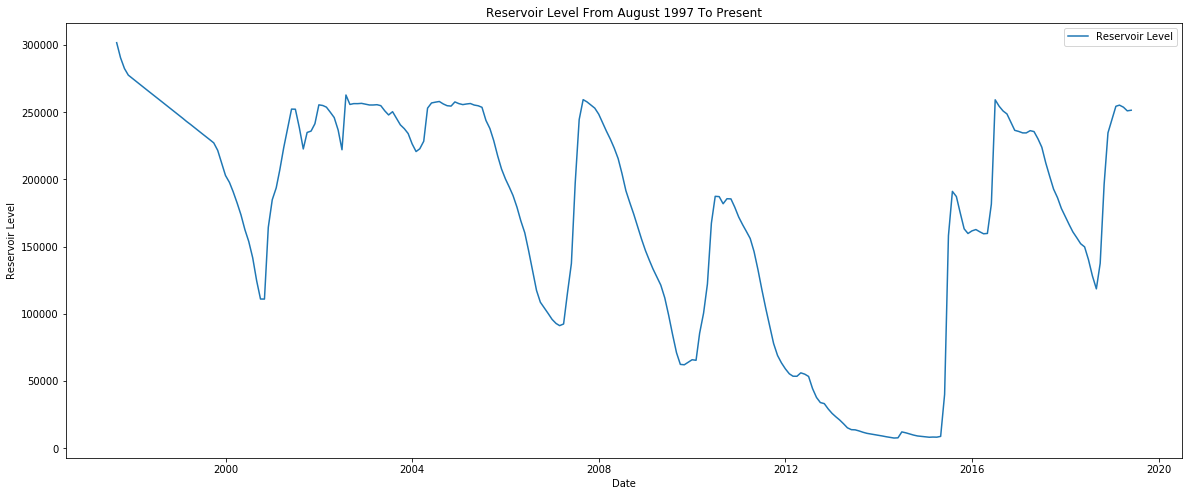

In [7]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=reservoir_agg.reservoir_storage, label='Reservoir Level')
# plt.hlines(y=lower_bound,
#            xmin=datetime.datetime(1997, 8, 31),
#            xmax=datetime.datetime(2017, 12, 31),
#            label='cutoff')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.title('Reservoir Level From August 1997 To Present')
plt.legend()
plt.show()

##### Reservoir Level Histogram

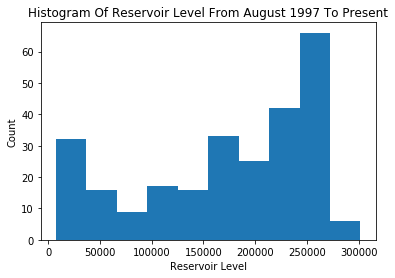

In [8]:
plt.hist(x=reservoir_agg.reservoir_storage)
plt.xlabel('Reservoir Level')
plt.ylabel('Count')
plt.title('Histogram Of Reservoir Level From August 1997 To Present')
plt.show()

# PDSI

In [9]:
pdsi = pd.read_csv('drought_data/PDSI_texas.csv', skiprows=2)
pdsi.rename(columns={'Date':'date', 'Value':'pdsi_value'}, inplace=True)

In [10]:
pdsi.date = pd.to_datetime(pdsi.date, format='%Y%m')

##### Days are at the beginning of the month.
To match the other datasets, we'll change it to the end of the month.

In [11]:
better_dates = []
for date in pdsi.date:
    month = date.month
    day = date.day
    year = date.year
    new_day = calendar.monthrange(year,month)[1]
    new_date = f'{year}-{month}-{new_day}'
    better_dates.append(new_date)
pdsi.date = better_dates

In [12]:
pdsi.date = pd.to_datetime(pdsi.date, format='%Y-%m-%d')

In [13]:
pdsi = pdsi.set_index('date')
pdsi = pdsi['1997-08':]
pdsi.head()

,pdsi_value
date,
1997-08-31,3.80
1997-09-30,2.86
1997-10-31,2.88
1997-11-30,2.71
1997-12-31,3.07


In [14]:
pdsi.tail()

,pdsi_value
date,
2018-08-31,-3.71
2018-09-30,1.50
2018-10-31,3.38
2018-11-30,3.58
2018-12-31,4.57


##### Mean and standard deviation

In [15]:
pdsi_mean = pdsi.pdsi_value.mean()
print(f'The monthly average for PDSI is: {pdsi_mean:.4f}')
pdsi_stdev = pdsi.pdsi_value.std()
print(f'The standard deviation for monthly PDSI values is: {pdsi_stdev:.4f}')

The monthly average for PDSI is: -0.6464
The standard deviation for monthly PDSI values is: 3.0920


##### Plotting PDSI

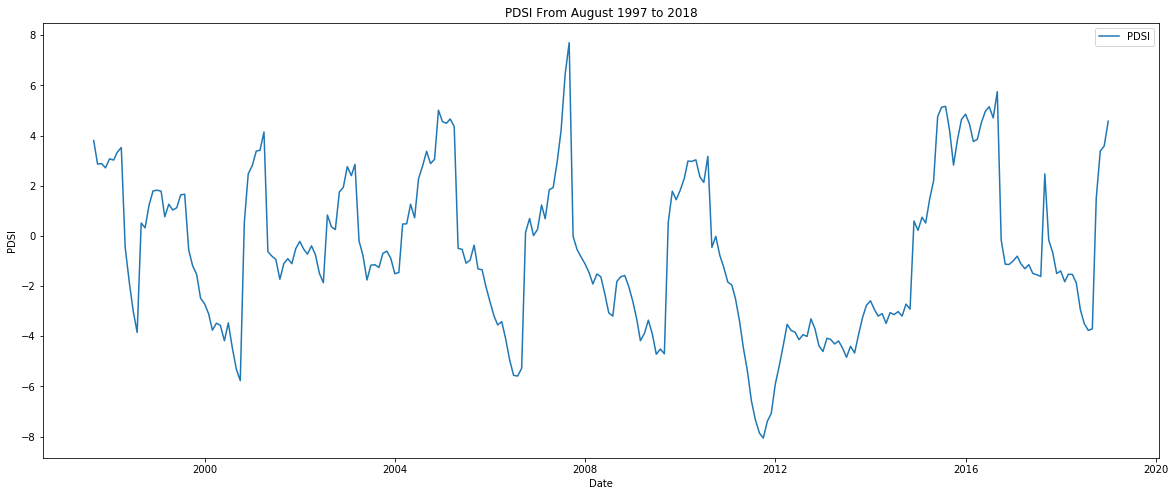

In [16]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=pdsi.pdsi_value, label='PDSI')
# plt.hlines(y=lower_bound,
#            xmin=datetime.datetime(1997, 8, 31),
#            xmax=datetime.datetime(2017, 12, 31),
#            label='cutoff')
plt.xlabel('Date')
plt.ylabel('PDSI')
plt.title('PDSI From August 1997 to 2018')
plt.legend()
plt.show()

##### PDSI Histogram

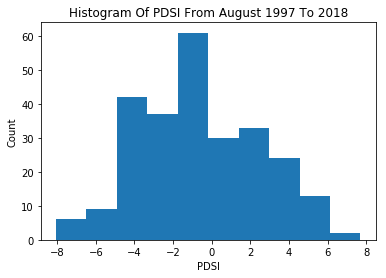

In [17]:
plt.hist(x=pdsi.pdsi_value)
plt.xlabel('PDSI')
plt.ylabel('Count')
plt.title('Histogram Of PDSI From August 1997 To 2018')
plt.show()

##### Min max scaling PDSI 

In [18]:
pdsiscaler = MinMaxScaler(feature_range=(0, 1))
pdsiscaler.fit(pdsi[['pdsi_value']])
pdsi['scaled_pdsi_value'] = pdsiscaler.transform(pdsi[['pdsi_value']])
pdsi.head()

,pdsi_value,scaled_pdsi_value
date,,
1997-08-31,3.80,0.752538
1997-09-30,2.86,0.692893
1997-10-31,2.88,0.694162
1997-11-30,2.71,0.683376
1997-12-31,3.07,0.706218


##### Identifying instances as drought.
Based on if the PDSI is less than -2

In [19]:
pdsi['drought'] = (pdsi.pdsi_value < (-2))
pdsi.head()

,pdsi_value,scaled_pdsi_value,drought
date,,,
1997-08-31,3.80,0.752538,False
1997-09-30,2.86,0.692893,False
1997-10-31,2.88,0.694162,False
1997-11-30,2.71,0.683376,False
1997-12-31,3.07,0.706218,False


##### Creating a dataframe of just the months identified as moderate drought.

In [20]:
drought_df = pdsi[pdsi.drought == True][:'2018-02'].reset_index()

##### Creating another column that will help identify the starting days of a drought.
The dates are copied to the new column then the difference is taken. We want to find which months are the start of a drought, not every month in a drought. We do this by finding the records where the difference in days from the previous month is more than 31 days.

In [21]:
drought_df['consecutive_days'] = drought_df.date

drought_df.head()

,date,pdsi_value,scaled_pdsi_value,drought,consecutive_days
0,1998-06-30,-2.98,0.322335,True,1998-06-30
1,1998-07-31,-3.85,0.267132,True,1998-07-31
2,1999-11-30,-2.49,0.353426,True,1999-11-30
3,1999-12-31,-2.71,0.339467,True,1999-12-31
4,2000-01-31,-3.11,0.314086,True,2000-01-31


In [22]:
drought_df.consecutive_days = drought_df.consecutive_days.diff()
drought_df.head()

,date,pdsi_value,scaled_pdsi_value,drought,consecutive_days
0,1998-06-30,-2.98,0.322335,True,NaT
1,1998-07-31,-3.85,0.267132,True,31 days
2,1999-11-30,-2.49,0.353426,True,487 days
3,1999-12-31,-2.71,0.339467,True,31 days
4,2000-01-31,-3.11,0.314086,True,31 days


In [23]:
drought_df.consecutive_days.loc[0] = timedelta(days=60)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
drought_df.loc[drought_df.consecutive_days > timedelta(days=31), 'consecutive_days'] = False
drought_df.loc[drought_df.consecutive_days != False, 'consecutive_days'] = True
drought_df.head()

,date,pdsi_value,scaled_pdsi_value,drought,consecutive_days
0,1998-06-30,-2.98,0.322335,True,False
1,1998-07-31,-3.85,0.267132,True,True
2,1999-11-30,-2.49,0.353426,True,False
3,1999-12-31,-2.71,0.339467,True,True
4,2000-01-31,-3.11,0.314086,True,True


##### Putting the dates in a list.

In [25]:
beginning_of_drought = list(drought_df[drought_df.consecutive_days == False]['date'])

##### Plotting the start dates of the droughts.

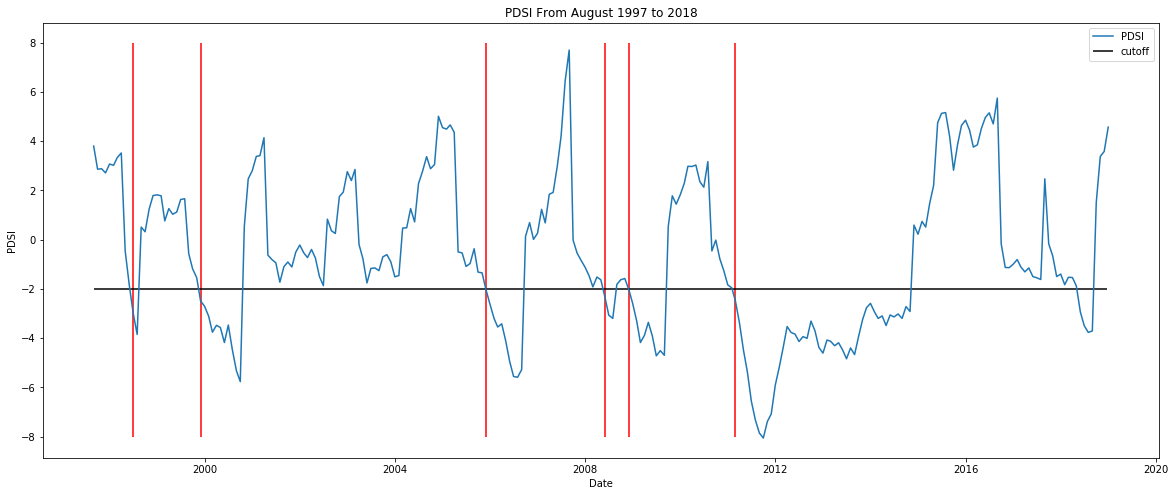

In [26]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=pdsi.pdsi_value, label='PDSI')
# plt.hlines(y=lower_bound,
#            xmin=datetime.datetime(1997, 8, 31),
#            xmax=datetime.datetime(2017, 12, 31),
#            label='cutoff')
for date in beginning_of_drought:
    plt.vlines(x=date, ymin=-8, ymax=8, color='red')
plt.hlines(y=-2,
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2018, 12, 21),
           label='cutoff')
plt.xlabel('Date')
plt.ylabel('PDSI')
plt.title('PDSI From August 1997 to 2018')
plt.legend()
plt.show()

##### Doing the same thing again but with severe drought.

In [27]:
pdsi['worse_drought'] = (pdsi.pdsi_value < (-3))
pdsi.head()

,pdsi_value,scaled_pdsi_value,drought,worse_drought
date,,,,
1997-08-31,3.80,0.752538,False,False
1997-09-30,2.86,0.692893,False,False
1997-10-31,2.88,0.694162,False,False
1997-11-30,2.71,0.683376,False,False
1997-12-31,3.07,0.706218,False,False


In [28]:
worse_drought_df = pdsi[pdsi.worse_drought == True][:'2018-02'].reset_index()

In [29]:
worse_drought_df['consecutive_days'] = worse_drought_df.date

worse_drought_df.head()

,date,pdsi_value,scaled_pdsi_value,drought,worse_drought,consecutive_days
0,1998-07-31,-3.85,0.267132,True,True,1998-07-31
1,2000-01-31,-3.11,0.314086,True,True,2000-01-31
2,2000-02-29,-3.76,0.272843,True,True,2000-02-29
3,2000-03-31,-3.48,0.290609,True,True,2000-03-31
4,2000-04-30,-3.57,0.284898,True,True,2000-04-30


In [30]:
worse_drought_df.consecutive_days = worse_drought_df.consecutive_days.diff()
worse_drought_df.head()

,date,pdsi_value,scaled_pdsi_value,drought,worse_drought,consecutive_days
0,1998-07-31,-3.85,0.267132,True,True,NaT
1,2000-01-31,-3.11,0.314086,True,True,549 days
2,2000-02-29,-3.76,0.272843,True,True,29 days
3,2000-03-31,-3.48,0.290609,True,True,31 days
4,2000-04-30,-3.57,0.284898,True,True,30 days


In [31]:
worse_drought_df.consecutive_days.loc[0] = timedelta(days=60)

In [32]:
worse_drought_df.loc[worse_drought_df.consecutive_days > timedelta(days=31), 'consecutive_days'] = False
worse_drought_df.loc[worse_drought_df.consecutive_days != False, 'consecutive_days'] = True
worse_drought_df.head()

,date,pdsi_value,scaled_pdsi_value,drought,worse_drought,consecutive_days
0,1998-07-31,-3.85,0.267132,True,True,False
1,2000-01-31,-3.11,0.314086,True,True,False
2,2000-02-29,-3.76,0.272843,True,True,True
3,2000-03-31,-3.48,0.290609,True,True,True
4,2000-04-30,-3.57,0.284898,True,True,True


In [33]:
beginning_of_worse_drought = list(worse_drought_df[worse_drought_df.consecutive_days == False]['date'])

# Soil Moisture

In [34]:
df = pd.read_csv('south_central_moisture_data_1988_2017.csv')
df.head()

,final_date,soil_moisture,pdsi
0,1988-03-01,4.79,0.0
1,1988-03-08,4.67,0.0
2,1988-03-15,4.24,0.0
3,1988-03-22,5.59,0.0
4,1988-03-29,5.00,0.0


In [35]:
df = df[['final_date', 'soil_moisture']]
df.head()

,final_date,soil_moisture
0,1988-03-01,4.79
1,1988-03-08,4.67
2,1988-03-15,4.24
3,1988-03-22,5.59
4,1988-03-29,5.00


In [36]:
df.final_date = pd.to_datetime(df.final_date)
df = df.set_index('final_date')
df.head()

,soil_moisture
final_date,
1988-03-01,4.79
1988-03-08,4.67
1988-03-15,4.24
1988-03-22,5.59
1988-03-29,5.00


In [37]:
df_monthly = df.soil_moisture.resample('M').agg('mean')

In [38]:
df_monthly = df_monthly['1997-08':]
df_monthly.head()

final_date
1997-08-31    2.0760
1997-09-30    1.2425
1997-10-31    4.7975
1997-11-30    7.0460
1997-12-31    8.0000
Freq: M, Name: soil_moisture, dtype: float64

In [39]:
df_monthly = df_monthly.to_frame(name=None)
df_monthly.head()

,soil_moisture
final_date,
1997-08-31,2.0760
1997-09-30,1.2425
1997-10-31,4.7975
1997-11-30,7.0460
1997-12-31,8.0000


In [40]:
monthly_mean = df_monthly.soil_moisture.mean()
print(f'The monthly average for soil moisture is: {monthly_mean:.4f}')

The monthly average for soil moisture is: 3.8026


In [41]:
monthly_stdev = df_monthly.soil_moisture.std()
print(f'The standard deviation for monthly soil moisture values is: {monthly_stdev:.4f}')

The standard deviation for monthly soil moisture values is: 2.6865


In [42]:
stdev_multiple = 1.0
lower_bound = (monthly_mean - (stdev_multiple*monthly_stdev))
print(f'The lower bound (1.25 std devs away from the mean) is: {(monthly_mean - (stdev_multiple*monthly_stdev)):.4f}')

The lower bound (1.25 std devs away from the mean) is: 1.1161


##### Plotting soil moisture

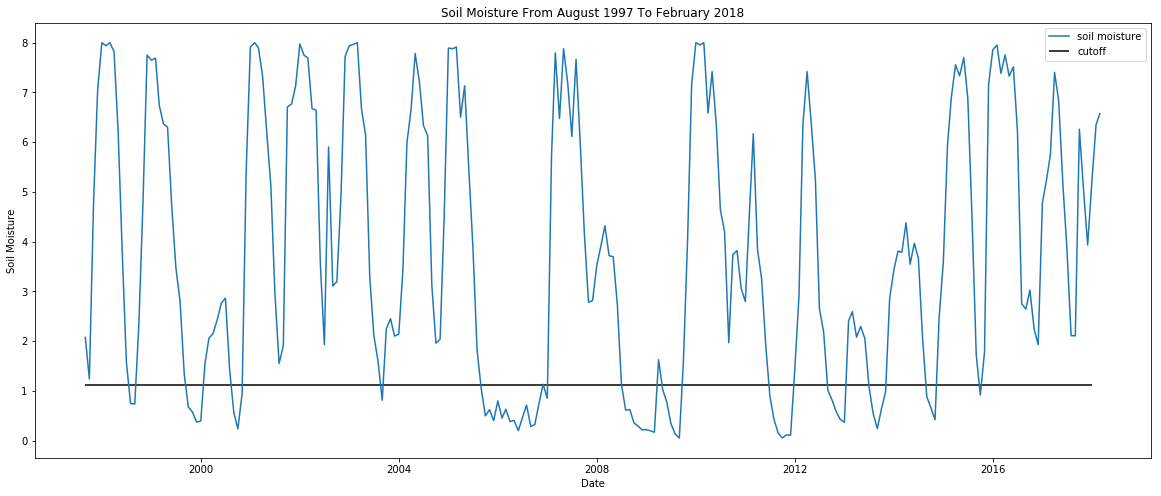

In [43]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_monthly.soil_moisture, label='soil moisture')
plt.hlines(y=lower_bound,
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2017, 12, 31),
           label='cutoff')
plt.xlabel('Date')
plt.ylabel('Soil Moisture')
plt.title('Soil Moisture From August 1997 To February 2018')
plt.legend()
plt.show()

##### Histogram of soil moisture

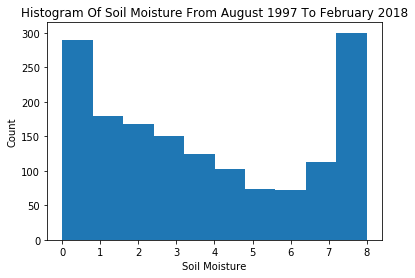

In [44]:
plt.hist(x=df.soil_moisture)
plt.xlabel('Soil Moisture')
plt.ylabel('Count')
plt.title('Histogram Of Soil Moisture From August 1997 To February 2018')
plt.show()

##### Min max scaling soil moisture

In [45]:
smscaler = MinMaxScaler(feature_range=(0, 1))
smscaler.fit(df_monthly[['soil_moisture']])
df_monthly['scaled_soil_moisture'] = smscaler.transform(df_monthly[['soil_moisture']])
df_monthly.head()

,soil_moisture,scaled_soil_moisture
final_date,,
1997-08-31,2.0760,0.254468
1997-09-30,1.2425,0.149572
1997-10-31,4.7975,0.596967
1997-11-30,7.0460,0.879940
1997-12-31,8.0000,1.000000


##### Adding a column for the lower bound so that we can have add another column that calculates the difference between soil moisture and the lower bound.

In [46]:
df_monthly["lower_bound"] = (monthly_mean - (stdev_multiple*monthly_stdev))

In [47]:
df_monthly["sm_minus_lb"] = (df_monthly.soil_moisture - df_monthly.lower_bound)

In [48]:
df_monthly.head()

,soil_moisture,scaled_soil_moisture,lower_bound,sm_minus_lb
final_date,,,,
1997-08-31,2.0760,0.254468,1.116146,0.959854
1997-09-30,1.2425,0.149572,1.116146,0.126354
1997-10-31,4.7975,0.596967,1.116146,3.681354
1997-11-30,7.0460,0.879940,1.116146,5.929854
1997-12-31,8.0000,1.000000,1.116146,6.883854


##### A column to determine if the soil moisture is below the cutoff.

In [49]:
df_monthly['outside_normal'] = (df_monthly.sm_minus_lb < 0)

In [50]:
num_below_lb = df_monthly.outside_normal.sum()
print(f'Number of months that are below the lower bound: {df_monthly.outside_normal.sum()}')
total_num = df_monthly.soil_moisture.count()
print(f'Total number of months: {df_monthly.soil_moisture.count()}')
print(f'Percent of months that are below threshold: {(num_below_lb/total_num)*100:.0f}%')

Number of months that are below the lower bound: 59
Total number of months: 247
Percent of months that are below threshold: 24%


In [51]:
df_monthly[df_monthly.sm_minus_lb < 0].head()

,soil_moisture,scaled_soil_moisture,lower_bound,sm_minus_lb,outside_normal
final_date,,,,,
1998-07-31,0.7475,0.087277,1.116146,-0.368646,True
1998-08-31,0.7380,0.086081,1.116146,-0.378146,True
1999-09-30,0.6800,0.078782,1.116146,-0.436146,True
1999-10-31,0.5750,0.065568,1.116146,-0.541146,True
1999-11-30,0.3740,0.040272,1.116146,-0.742146,True


In [52]:
other_other_warnings = list(df_monthly[df_monthly.outside_normal == True].reset_index().final_date)

In [53]:
df_monthly.head()

,soil_moisture,scaled_soil_moisture,lower_bound,sm_minus_lb,outside_normal
final_date,,,,,
1997-08-31,2.0760,0.254468,1.116146,0.959854,False
1997-09-30,1.2425,0.149572,1.116146,0.126354,False
1997-10-31,4.7975,0.596967,1.116146,3.681354,False
1997-11-30,7.0460,0.879940,1.116146,5.929854,False
1997-12-31,8.0000,1.000000,1.116146,6.883854,False


# Plotting Soil Mositure, PDSI, and Reservoir Levels
To scale lower bound, we use the scaler object from when we scaled the soil moisture. The lower bound also needs to be a 2d array.

##### Creating dataframes with one value so that we can use those values with a MinMaxScaler object.

In [54]:
lower_bound_df = pd.DataFrame({'a':'asf',
              'value':[lower_bound]})

pdsi_neg_two_df = pd.DataFrame({'a':'asf',
              'value':[-2]})
pdsi_zero_df = pd.DataFrame({'a':'asf',
              'value':[0]})
pdsi_neg_three_df = pd.DataFrame({'a':'asf',
              'value':[-3]})

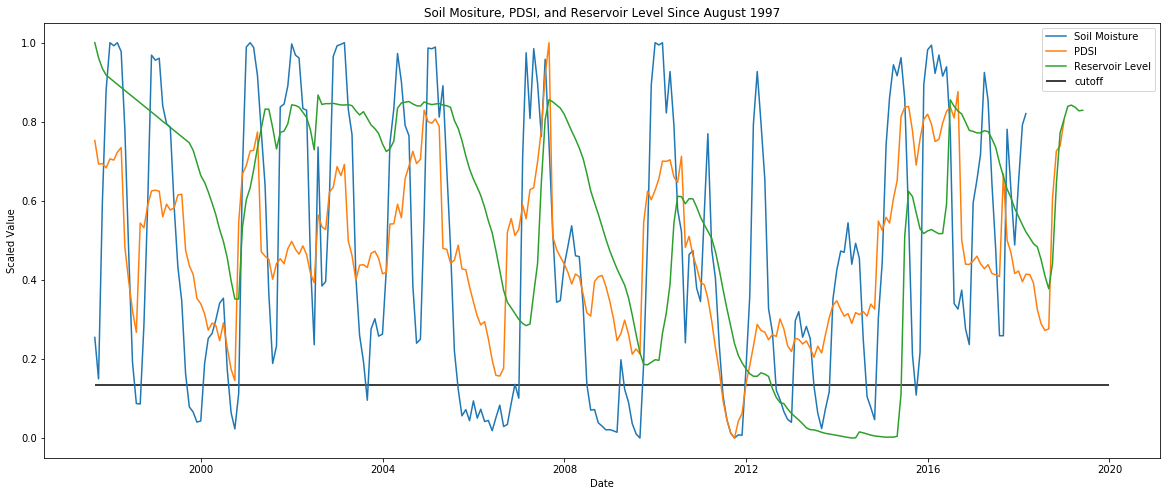

In [55]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_monthly.scaled_soil_moisture, label='Soil Moisture')
sns.lineplot(data=pdsi.scaled_pdsi_value, label='PDSI')
sns.lineplot(data=reservoir_agg.scaled_reservoir_storage, label='Reservoir Level')
plt.hlines(y=smscaler.transform(lower_bound_df[['value']]),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='cutoff')
plt.title('Soil Mositure, PDSI, and Reservoir Level Since August 1997')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

##### Creating a dataframe so we can grab the months where soil moisture falls below the cutoff.
Process is similar to the one for drought.

In [56]:
test = df_monthly[df_monthly.outside_normal == True].reset_index().copy()
test.head()

,final_date,soil_moisture,scaled_soil_moisture,lower_bound,sm_minus_lb,outside_normal
0,1998-07-31,0.7475,0.087277,1.116146,-0.368646,True
1,1998-08-31,0.7380,0.086081,1.116146,-0.378146,True
2,1999-09-30,0.6800,0.078782,1.116146,-0.436146,True
3,1999-10-31,0.5750,0.065568,1.116146,-0.541146,True
4,1999-11-30,0.3740,0.040272,1.116146,-0.742146,True


In [57]:
test['consecutive_days'] = test.final_date

In [58]:
test.head()

,final_date,soil_moisture,scaled_soil_moisture,lower_bound,sm_minus_lb,outside_normal,consecutive_days
0,1998-07-31,0.7475,0.087277,1.116146,-0.368646,True,1998-07-31
1,1998-08-31,0.7380,0.086081,1.116146,-0.378146,True,1998-08-31
2,1999-09-30,0.6800,0.078782,1.116146,-0.436146,True,1999-09-30
3,1999-10-31,0.5750,0.065568,1.116146,-0.541146,True,1999-10-31
4,1999-11-30,0.3740,0.040272,1.116146,-0.742146,True,1999-11-30


In [59]:
test.consecutive_days = test.consecutive_days.diff()
test.head()

,final_date,soil_moisture,scaled_soil_moisture,lower_bound,sm_minus_lb,outside_normal,consecutive_days
0,1998-07-31,0.7475,0.087277,1.116146,-0.368646,True,NaT
1,1998-08-31,0.7380,0.086081,1.116146,-0.378146,True,31 days
2,1999-09-30,0.6800,0.078782,1.116146,-0.436146,True,395 days
3,1999-10-31,0.5750,0.065568,1.116146,-0.541146,True,31 days
4,1999-11-30,0.3740,0.040272,1.116146,-0.742146,True,30 days


In [60]:
test.consecutive_days.loc[0] = timedelta(days=60)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
test.head()

,final_date,soil_moisture,scaled_soil_moisture,lower_bound,sm_minus_lb,outside_normal,consecutive_days
0,1998-07-31,0.7475,0.087277,1.116146,-0.368646,True,60 days
1,1998-08-31,0.7380,0.086081,1.116146,-0.378146,True,31 days
2,1999-09-30,0.6800,0.078782,1.116146,-0.436146,True,395 days
3,1999-10-31,0.5750,0.065568,1.116146,-0.541146,True,31 days
4,1999-11-30,0.3740,0.040272,1.116146,-0.742146,True,30 days


In [62]:
test.loc[test.consecutive_days > timedelta(days=31), 'consecutive_days'] = False
test.loc[test.consecutive_days != False, 'consecutive_days'] = True
test.head()

,final_date,soil_moisture,scaled_soil_moisture,lower_bound,sm_minus_lb,outside_normal,consecutive_days
0,1998-07-31,0.7475,0.087277,1.116146,-0.368646,True,False
1,1998-08-31,0.7380,0.086081,1.116146,-0.378146,True,True
2,1999-09-30,0.6800,0.078782,1.116146,-0.436146,True,False
3,1999-10-31,0.5750,0.065568,1.116146,-0.541146,True,True
4,1999-11-30,0.3740,0.040272,1.116146,-0.742146,True,True


In [63]:
early_warning_days = list(test[test.consecutive_days == False]['final_date'])
early_warning_days

[Timestamp('1998-07-31 00:00:00'),
 Timestamp('1999-09-30 00:00:00'),
 Timestamp('2000-08-31 00:00:00'),
 Timestamp('2003-08-31 00:00:00'),
 Timestamp('2005-08-31 00:00:00'),
 Timestamp('2006-12-31 00:00:00'),
 Timestamp('2008-07-31 00:00:00'),
 Timestamp('2009-04-30 00:00:00'),
 Timestamp('2011-06-30 00:00:00'),
 Timestamp('2012-08-31 00:00:00'),
 Timestamp('2013-06-30 00:00:00'),
 Timestamp('2014-08-31 00:00:00'),
 Timestamp('2015-09-30 00:00:00')]

##### First run at the plot

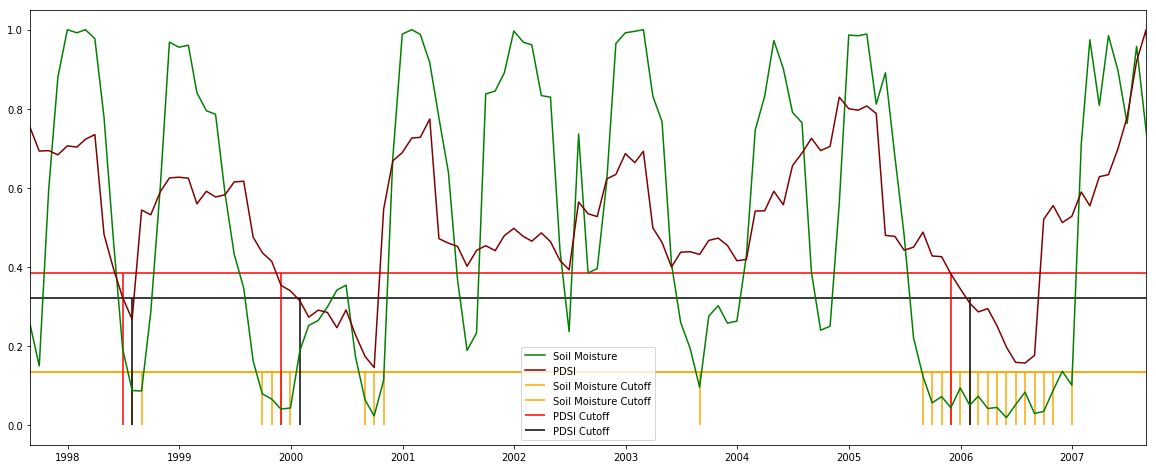

In [64]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_monthly.scaled_soil_moisture, label='Soil Moisture', color='green')
sns.lineplot(data=pdsi.scaled_pdsi_value, label='PDSI', color='maroon')
# sns.lineplot(data=reservoir_agg.scaled_reservoir_storage, label='Reservoir Level', color='blue')
plt.hlines(y=(smscaler.transform(lower_bound_df[['value']])),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='Soil Moisture Cutoff',
           color='orange')
plt.hlines(y=smscaler.transform(lower_bound_df[['value']]),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='Soil Moisture Cutoff',
           color='orange')
plt.hlines(y=pdsiscaler.transform(pdsi_neg_two_df[['value']]),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='PDSI Cutoff',
           color='red')
# plt.hlines(y=pdsiscaler.transform(pdsi_zero_df[['value']]),
#            xmin=datetime.datetime(1997, 8, 31),
#            xmax=datetime.datetime(2019, 12, 31),
#            label='PDSI Cutoff',
#            color='red')
plt.hlines(y=pdsiscaler.transform(pdsi_neg_three_df[['value']]),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='PDSI Cutoff',
           color='black')
for date in other_other_warnings:
    plt.vlines(x=date, ymin=0, ymax=smscaler.transform(lower_bound_df[['value']]), color='orange')
for date in beginning_of_drought:
    plt.vlines(x=date, ymin=0, ymax=pdsiscaler.transform(pdsi_neg_two_df[['value']]), color='red')
for date in beginning_of_worse_drought:
    plt.vlines(x=date, ymin=0, ymax=pdsiscaler.transform(pdsi_neg_three_df[['value']]), color='black')
plt.xlim((datetime.datetime(1997, 8, 31), datetime.datetime(2007, 8, 31)))
# plt.xlim((datetime.datetime(2007, 8, 31), datetime.datetime(2019, 8, 31)))
plt.legend()
plt.show()

##### Second run

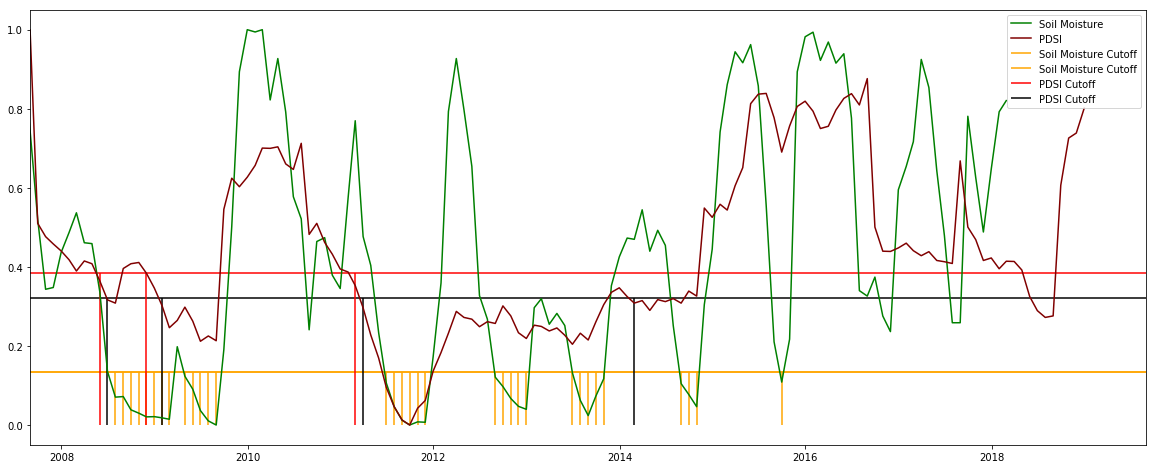

In [65]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_monthly.scaled_soil_moisture, label='Soil Moisture', color='green')
sns.lineplot(data=pdsi.scaled_pdsi_value, label='PDSI', color='maroon')
# sns.lineplot(data=reservoir_agg.scaled_reservoir_storage, label='Reservoir Level', color='blue')
plt.hlines(y=(smscaler.transform(lower_bound_df[['value']])),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='Soil Moisture Cutoff',
           color='orange')
plt.hlines(y=smscaler.transform(lower_bound_df[['value']]),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='Soil Moisture Cutoff',
           color='orange')
plt.hlines(y=pdsiscaler.transform(pdsi_neg_two_df[['value']]),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='PDSI Cutoff',
           color='red')
# plt.hlines(y=pdsiscaler.transform(pdsi_zero_df[['value']]),
#            xmin=datetime.datetime(1997, 8, 31),
#            xmax=datetime.datetime(2019, 12, 31),
#            label='PDSI Cutoff',
#            color='red')
plt.hlines(y=pdsiscaler.transform(pdsi_neg_three_df[['value']]),
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2019, 12, 31),
           label='PDSI Cutoff',
           color='black')
for date in other_other_warnings:
    plt.vlines(x=date, ymin=0, ymax=smscaler.transform(lower_bound_df[['value']]), color='orange')
for date in beginning_of_drought:
    plt.vlines(x=date, ymin=0, ymax=pdsiscaler.transform(pdsi_neg_two_df[['value']]), color='red')
for date in beginning_of_worse_drought:
    plt.vlines(x=date, ymin=0, ymax=pdsiscaler.transform(pdsi_neg_three_df[['value']]), color='black')
# plt.xlim((datetime.datetime(1997, 8, 31), datetime.datetime(2007, 8, 31)))
plt.xlim((datetime.datetime(2007, 8, 31), datetime.datetime(2019, 8, 31)))
plt.legend()
plt.show()

##### Another dataframe so I can scale the monthly soil moisture mean.

In [66]:
mean_df = pd.DataFrame({'a':'asf',
              'value':[monthly_mean]})
smscaler.transform(mean_df[['value']])

array([[0.47175919]])

##### The next few cells show the warning days and the days where moderate drought start.
They are shown in a dataframe. This allows me to see how far away the warning days are from the drought days.

In [67]:
warning_df = pd.DataFrame({'date':early_warning_days, 'warning_or_start':'warning'})
warning_df

,date,warning_or_start
0,1998-07-31,warning
1,1999-09-30,warning
2,2000-08-31,warning
3,2003-08-31,warning
4,2005-08-31,warning
5,2006-12-31,warning
6,2008-07-31,warning
7,2009-04-30,warning
8,2011-06-30,warning
9,2012-08-31,warning


In [68]:
start_df = pd.DataFrame({'date':beginning_of_drought, 'warning_or_start':'start'})
start_df

,date,warning_or_start
0,1998-06-30,start
1,1999-11-30,start
2,2005-11-30,start
3,2008-05-31,start
4,2008-11-30,start
5,2011-02-28,start


In [69]:
pd.concat([warning_df, start_df]).sort_values(by='date')

,date,warning_or_start
0,1998-06-30,start
0,1998-07-31,warning
1,1999-09-30,warning
1,1999-11-30,start
2,2000-08-31,warning
3,2003-08-31,warning
4,2005-08-31,warning
2,2005-11-30,start
5,2006-12-31,warning
3,2008-05-31,start


##### Taking my SVR model and making predictions for the whole data set.
We are pulling in the soil moisture data again, reformatting it so that we have windows to input, and making predictions.

In [70]:
new_df = pd.read_csv('south_central_moisture_data_1988_2017.csv')
new_df.head()

,final_date,soil_moisture,pdsi
0,1988-03-01,4.79,0.0
1,1988-03-08,4.67,0.0
2,1988-03-15,4.24,0.0
3,1988-03-22,5.59,0.0
4,1988-03-29,5.00,0.0


In [71]:
new_df = new_df[['final_date', 'soil_moisture']]
new_df.head()

,final_date,soil_moisture
0,1988-03-01,4.79
1,1988-03-08,4.67
2,1988-03-15,4.24
3,1988-03-22,5.59
4,1988-03-29,5.00


In [72]:
new_df.final_date = pd.to_datetime(new_df.final_date)
new_df = new_df.set_index('final_date')
new_df.head()

,soil_moisture
final_date,
1988-03-01,4.79
1988-03-08,4.67
1988-03-15,4.24
1988-03-22,5.59
1988-03-29,5.00


In [73]:
new_df = new_df['1997-08':]
new_df.head()

,soil_moisture
final_date,
1997-08-02,2.80
1997-08-09,2.54
1997-08-16,2.02
1997-08-23,1.65
1997-08-30,1.37


In [74]:
from predict import drought_SVR, embed_data

##### Reformatting the data

In [75]:
x, y = embed_data(np.array(new_df.soil_moisture), 3, 2)

##### Getting the dates so we can pair them with the predictions

In [76]:
date_series = new_df.soil_moisture.to_frame()['1997-09-06':].reset_index().final_date
date_series.head()

0   1997-09-06
1   1997-09-13
2   1997-09-20
3   1997-09-27
4   1997-10-04
Name: final_date, dtype: datetime64[ns]

##### Creating a dataframe of the predictions

In [77]:
pred_df_to_plot = pd.DataFrame({'date':date_series, 'prediction':drought_SVR.predict(x)}).set_index('date')
pred_df_to_plot.head()

,prediction
date,
1997-09-06,1.699196
1997-09-13,1.256513
1997-09-20,1.003009
1997-09-27,0.854292
1997-10-04,0.742882


##### Scaling the predictions

In [78]:
predscaler = MinMaxScaler()
predscaler.fit(pred_df_to_plot[['prediction']])

pred_df_to_plot['scaled_predictions'] = predscaler.transform(pred_df_to_plot[['prediction']])
pred_df_to_plot.head()

,prediction,scaled_predictions
date,,
1997-09-06,1.699196,0.252937
1997-09-13,1.256513,0.201621
1997-09-20,1.003009,0.172235
1997-09-27,0.854292,0.154996
1997-10-04,0.742882,0.142081


In [79]:
agg_df = pd.DataFrame({'monthly_predictions':pred_df_to_plot.prediction.resample('M').agg('mean')})

agg_df["lower_bound"] = (monthly_mean - (stdev_multiple*monthly_stdev))
agg_df['sm_minus_lb'] = agg_df.monthly_predictions - agg_df.lower_bound
agg_df['outside_normal'] = (agg_df.sm_minus_lb < 0)
agg_df.head()

,monthly_predictions,lower_bound,sm_minus_lb,outside_normal
date,,,,
1997-09-30,1.203252,1.116146,0.087107,False
1997-10-31,1.186040,1.116146,0.069895,False
1997-11-30,5.388087,1.116146,4.271941,False
1997-12-31,7.847740,1.116146,6.731594,False
1998-01-31,7.891733,1.116146,6.775587,False


In [80]:
agg_df.describe()

,monthly_predictions,lower_bound,sm_minus_lb
count,246.000000,2.460000e+02,246.000000
mean,3.604781,1.116146e+00,2.488635
std,2.636089,6.452422e-15,2.636089
min,0.415916,1.116146e+00,-0.700230
25%,1.113655,1.116146e+00,-0.002491
50%,2.760905,1.116146e+00,1.644759
75%,6.202869,1.116146e+00,5.086723
max,7.900283,1.116146e+00,6.784137


##### Finding the "early_warning" days.

In [81]:
pred_warning = agg_df[agg_df.outside_normal == True].reset_index().copy()
pred_warning.head()

,date,monthly_predictions,lower_bound,sm_minus_lb,outside_normal
0,1998-07-31,0.956658,1.116146,-0.159488,True
1,1998-08-31,0.493187,1.116146,-0.622959,True
2,1998-09-30,1.096644,1.116146,-0.019501,True
3,1999-09-30,0.757496,1.116146,-0.358650,True
4,1999-10-31,0.540469,1.116146,-0.575677,True


In [82]:
pred_warning.describe()

,monthly_predictions,lower_bound,sm_minus_lb
count,62.000000,6.200000e+01,62.000000
mean,0.677369,1.116146e+00,-0.438776
std,0.193193,8.954290e-16,0.193193
min,0.415916,1.116146e+00,-0.700230
25%,0.522445,1.116146e+00,-0.593701
50%,0.601721,1.116146e+00,-0.514425
75%,0.805345,1.116146e+00,-0.310801
max,1.096644,1.116146e+00,-0.019501


In [83]:
pred_warning['consecutive_days'] = pred_warning.date

In [84]:
pred_warning.consecutive_days = pred_warning.consecutive_days.diff()
pred_warning.head()

,date,monthly_predictions,lower_bound,sm_minus_lb,outside_normal,consecutive_days
0,1998-07-31,0.956658,1.116146,-0.159488,True,NaT
1,1998-08-31,0.493187,1.116146,-0.622959,True,31 days
2,1998-09-30,1.096644,1.116146,-0.019501,True,30 days
3,1999-09-30,0.757496,1.116146,-0.358650,True,365 days
4,1999-10-31,0.540469,1.116146,-0.575677,True,31 days


In [85]:
pred_warning.consecutive_days.loc[0] = timedelta(days=60)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [86]:
pred_warning.loc[pred_warning.consecutive_days > timedelta(days=31), 'consecutive_days'] = False
pred_warning.loc[pred_warning.consecutive_days != False, 'consecutive_days'] = True
pred_warning.head()

,date,monthly_predictions,lower_bound,sm_minus_lb,outside_normal,consecutive_days
0,1998-07-31,0.956658,1.116146,-0.159488,True,False
1,1998-08-31,0.493187,1.116146,-0.622959,True,True
2,1998-09-30,1.096644,1.116146,-0.019501,True,True
3,1999-09-30,0.757496,1.116146,-0.358650,True,False
4,1999-10-31,0.540469,1.116146,-0.575677,True,True


In [87]:
pred_warning[pred_warning.consecutive_days == False].set_index('date')

,monthly_predictions,lower_bound,sm_minus_lb,outside_normal,consecutive_days
date,,,,,
1998-07-31,0.956658,1.116146,-0.159488,True,False
1999-09-30,0.757496,1.116146,-0.358650,True,False
2000-08-31,0.725816,1.116146,-0.390330,True,False
2001-08-31,0.819586,1.116146,-0.296560,True,False
2003-08-31,1.062131,1.116146,-0.054015,True,False
2005-09-30,0.607939,1.116146,-0.508207,True,False
2006-12-31,0.574312,1.116146,-0.541834,True,False
2008-07-31,0.635118,1.116146,-0.481027,True,False
2009-04-30,0.860665,1.116146,-0.255481,True,False


In [88]:
pred_warning_days = list(pred_warning[pred_warning.consecutive_days == False]['date'])
# del pred_warning_days[6]
pred_warning_days

[Timestamp('1998-07-31 00:00:00'),
 Timestamp('1999-09-30 00:00:00'),
 Timestamp('2000-08-31 00:00:00'),
 Timestamp('2001-08-31 00:00:00'),
 Timestamp('2003-08-31 00:00:00'),
 Timestamp('2005-09-30 00:00:00'),
 Timestamp('2006-12-31 00:00:00'),
 Timestamp('2008-07-31 00:00:00'),
 Timestamp('2009-04-30 00:00:00'),
 Timestamp('2009-06-30 00:00:00'),
 Timestamp('2010-09-30 00:00:00'),
 Timestamp('2011-07-31 00:00:00'),
 Timestamp('2012-09-30 00:00:00'),
 Timestamp('2013-07-31 00:00:00'),
 Timestamp('2014-09-30 00:00:00'),
 Timestamp('2015-09-30 00:00:00')]

In [89]:
pred_drought_days = []
for date in pred_warning_days:
    predicted_drought_day = date + timedelta(days=60) # 60 days = 2 months
    pred_drought_days.append(predicted_drought_day)

In [90]:
end_drought_range_days = []
for date in pred_drought_days:
    predicted_drought_day = date + timedelta(days=120) # 120 days = 4 months
    end_drought_range_days.append(predicted_drought_day)

In [91]:
pred_agg_to_plot = pred_df_to_plot.scaled_predictions.resample('M').agg('mean')

In [92]:
all_dates = pred_agg_to_plot.reset_index().date

In [93]:
end_drought_range_days

[Timestamp('1999-01-27 00:00:00'),
 Timestamp('2000-03-28 00:00:00'),
 Timestamp('2001-02-27 00:00:00'),
 Timestamp('2002-02-27 00:00:00'),
 Timestamp('2004-02-27 00:00:00'),
 Timestamp('2006-03-29 00:00:00'),
 Timestamp('2007-06-29 00:00:00'),
 Timestamp('2009-01-27 00:00:00'),
 Timestamp('2009-10-27 00:00:00'),
 Timestamp('2009-12-27 00:00:00'),
 Timestamp('2011-03-29 00:00:00'),
 Timestamp('2012-01-27 00:00:00'),
 Timestamp('2013-03-29 00:00:00'),
 Timestamp('2014-01-27 00:00:00'),
 Timestamp('2015-03-29 00:00:00'),
 Timestamp('2016-03-28 00:00:00')]

In [94]:
pred_drought_days

[Timestamp('1998-09-29 00:00:00'),
 Timestamp('1999-11-29 00:00:00'),
 Timestamp('2000-10-30 00:00:00'),
 Timestamp('2001-10-30 00:00:00'),
 Timestamp('2003-10-30 00:00:00'),
 Timestamp('2005-11-29 00:00:00'),
 Timestamp('2007-03-01 00:00:00'),
 Timestamp('2008-09-29 00:00:00'),
 Timestamp('2009-06-29 00:00:00'),
 Timestamp('2009-08-29 00:00:00'),
 Timestamp('2010-11-29 00:00:00'),
 Timestamp('2011-09-29 00:00:00'),
 Timestamp('2012-11-29 00:00:00'),
 Timestamp('2013-09-29 00:00:00'),
 Timestamp('2014-11-29 00:00:00'),
 Timestamp('2015-11-29 00:00:00')]

In [95]:
drought_date_ranges = list(zip(pred_drought_days, end_drought_range_days))
drought_date_ranges

[(Timestamp('1998-09-29 00:00:00'), Timestamp('1999-01-27 00:00:00')),
 (Timestamp('1999-11-29 00:00:00'), Timestamp('2000-03-28 00:00:00')),
 (Timestamp('2000-10-30 00:00:00'), Timestamp('2001-02-27 00:00:00')),
 (Timestamp('2001-10-30 00:00:00'), Timestamp('2002-02-27 00:00:00')),
 (Timestamp('2003-10-30 00:00:00'), Timestamp('2004-02-27 00:00:00')),
 (Timestamp('2005-11-29 00:00:00'), Timestamp('2006-03-29 00:00:00')),
 (Timestamp('2007-03-01 00:00:00'), Timestamp('2007-06-29 00:00:00')),
 (Timestamp('2008-09-29 00:00:00'), Timestamp('2009-01-27 00:00:00')),
 (Timestamp('2009-06-29 00:00:00'), Timestamp('2009-10-27 00:00:00')),
 (Timestamp('2009-08-29 00:00:00'), Timestamp('2009-12-27 00:00:00')),
 (Timestamp('2010-11-29 00:00:00'), Timestamp('2011-03-29 00:00:00')),
 (Timestamp('2011-09-29 00:00:00'), Timestamp('2012-01-27 00:00:00')),
 (Timestamp('2012-11-29 00:00:00'), Timestamp('2013-03-29 00:00:00')),
 (Timestamp('2013-09-29 00:00:00'), Timestamp('2014-01-27 00:00:00')),
 (Time

In [101]:
del beginning_of_worse_drought[-1]
beginning_of_worse_drought

[Timestamp('1998-07-31 00:00:00'),
 Timestamp('2000-01-31 00:00:00'),
 Timestamp('2006-01-31 00:00:00'),
 Timestamp('2008-06-30 00:00:00'),
 Timestamp('2009-01-31 00:00:00'),
 Timestamp('2011-03-31 00:00:00')]

### The Final Plot

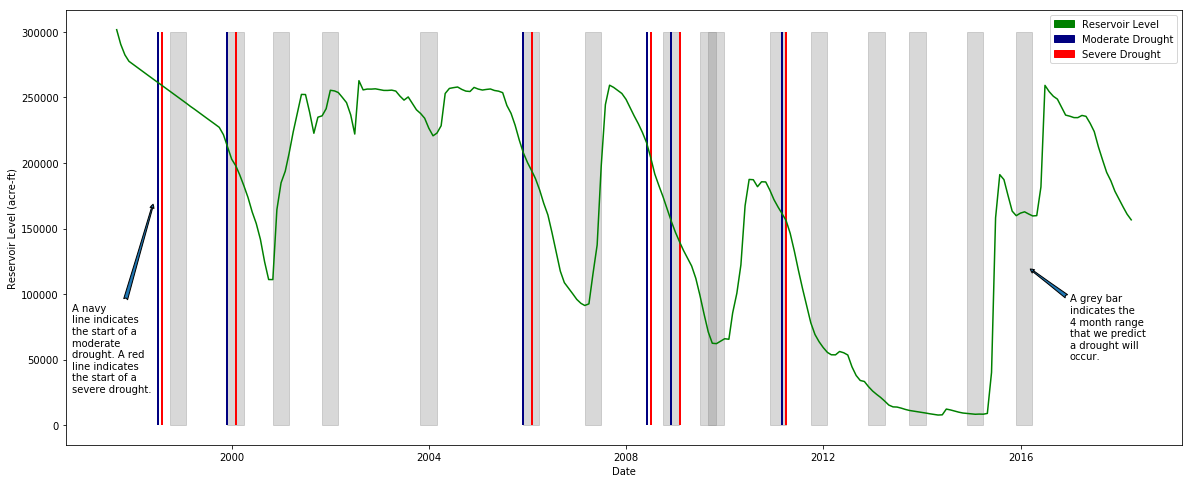

In [102]:
# for i in range(1, 5):
# plt.subplot(4, 1, i)
plt.figure(figsize=(20, 8))
sns.lineplot(data=reservoir_agg.reservoir_storage[:'2018-03'], label='Reservoir Level', color='green')
# sns.lineplot(data=pred_agg_to_plot, label='Predicted Soil Moisture', color='blue')
# sns.lineplot(data=df_monthly.scaled_soil_moisture, label='Actual Soil Moisture', color='green')
# sns.lineplot(data=pdsi.scaled_pdsi_value[:'2018-02'], label='PDSI', color='red')
# plt.hlines(y=smscaler.transform(lower_bound_df[['value']]), 
#            xmin=datetime.datetime(1997, 8, 31),
#            xmax=datetime.datetime(2019, 12, 31),
#            label='Soil Moisture Cutoff', color='black')
#     for date in all_dates:
#         plt.vlines(x=date, ymin=0, ymax=smscaler.transform(lower_bound_df[['value']]), color='grey', alpha=0.2)
#     for date in pred_warning_days:
#         plt.vlines(x=date, ymin=0, ymax=smscaler.transform(lower_bound_df[['value']]), color='blue')
#     for date in pred_drought_days:
#         plt.vlines(x=date, ymin=0, ymax=smscaler.transform(lower_bound_df[['value']]), color='cyan')
for date in beginning_of_drought:
    plt.vlines(x=date, ymin=0, ymax=300000, linewidth=2, color='navy', label='Moderate Drought')
for date in beginning_of_worse_drought:
    plt.vlines(x=date, ymin=0, ymax=300000, linewidth=2, color='red', label='Severe Drought')
for date_range in drought_date_ranges:
    plt.fill_between([date_range[0], date_range[1]], 0, 300000,
                     color='grey', alpha='0.3')
#     if i == 1:
#         plt.xlim((datetime.datetime(1997, 8, 31), datetime.datetime(2002, 8, 31)))
#     if i == 2:
#         plt.xlim((datetime.datetime(2002, 8, 31), datetime.datetime(2007, 8, 31)))
#     if i == 3:
#         plt.xlim((datetime.datetime(2007, 8, 31), datetime.datetime(2012, 8, 31)))
#     if i == 4:
#         plt.xlim((datetime.datetime(2012, 8, 31), datetime.datetime(2019, 8, 31)))
# plt.title('Reservoir Level and Predicted Droughts')
plt.xlabel('Date')
plt.ylabel('Reservoir Level (acre-ft)')

reservoir_patch = mpatches.Patch(color='green', label='Reservoir Level')
moderate_patch = mpatches.Patch(color='navy', label='Moderate Drought')
severe_patch = mpatches.Patch(color='red', label='Severe Drought')

plt.legend(handles=[reservoir_patch, moderate_patch, severe_patch])

plt.annotate('''A grey bar 
indicates the  
4 month range
that we predict
a drought will 
occur.''', (datetime.datetime(2016, 3, 1), 120000),
             (datetime.datetime(2017, 1, 1), 50000), arrowprops={'arrowstyle':'fancy'})

plt.annotate('''A navy 
line indicates 
the start of a 
moderate 
drought. A red 
line indicates
the start of a 
severe drought.''', (datetime.datetime(1998, 6, 1), 170000),
             (datetime.datetime(1996, 10, 1), 25000), arrowprops={'arrowstyle':'fancy'})


plt.show()

In [97]:
4/7

0.5714285714285714

In [98]:
# # for i in range(1, 5):
# # plt.subplot(4, 1, i)
# plt.figure(figsize=(20, 8))
# # sns.lineplot(data=reservoir_agg.scaled_reservoir_storage[:'2018-03'], label='Reservoir Level', color='blue')
# # sns.lineplot(data=pred_agg_to_plot, label='Predicted Soil Moisture', color='blue')
# # sns.lineplot(data=df_monthly.scaled_soil_moisture, label='Actual Soil Moisture', color='green')
# sns.lineplot(data=pdsi.scaled_pdsi_value[:'2018-02'], label='PDSI', color='green')
# # plt.hlines(y=smscaler.transform(lower_bound_df[['value']]), 
# #            xmin=datetime.datetime(1997, 8, 31),
# #            xmax=datetime.datetime(2019, 12, 31),
# #            label='Soil Moisture Cutoff', color='black')
# #     for date in all_dates:
# #         plt.vlines(x=date, ymin=0, ymax=smscaler.transform(lower_bound_df[['value']]), color='grey', alpha=0.2)
# #     for date in pred_warning_days:
# #         plt.vlines(x=date, ymin=0, ymax=smscaler.transform(lower_bound_df[['value']]), color='blue')
# #     for date in pred_drought_days:
# #         plt.vlines(x=date, ymin=0, ymax=smscaler.transform(lower_bound_df[['value']]), color='cyan')
# for date in beginning_of_drought:
#     plt.vlines(x=date, ymin=0, ymax=1, linewidth=2, color='orange', label='Moderate Drought')
# for date in beginning_of_worse_drought:
#     plt.vlines(x=date, ymin=0, ymax=1, linewidth=2, color='red', label='Severe Drought')
# for date_range in drought_date_ranges:
#     plt.fill_between([date_range[0], date_range[1]], 0, 1,
#                      color='grey', alpha='0.3')
# #     if i == 1:
# #         plt.xlim((datetime.datetime(1997, 8, 31), datetime.datetime(2002, 8, 31)))
# #     if i == 2:
# #         plt.xlim((datetime.datetime(2002, 8, 31), datetime.datetime(2007, 8, 31)))
# #     if i == 3:
# #         plt.xlim((datetime.datetime(2007, 8, 31), datetime.datetime(2012, 8, 31)))
# #     if i == 4:
# #         plt.xlim((datetime.datetime(2012, 8, 31), datetime.datetime(2019, 8, 31)))
# plt.title('PDSI and Predicted Droughts')
# plt.xlabel('Date')
# plt.ylabel('Scaled PDSI')

# reservoir_patch = mpatches.Patch(color='green', label='PDSI')
# moderate_patch = mpatches.Patch(color='orange', label='Moderate Drought')
# severe_patch = mpatches.Patch(color='red', label='Severe Drought')

# plt.legend(handles=[reservoir_patch, moderate_patch, severe_patch])

# plt.annotate('''A grey bar 
# indicates the  
# 4 month range
# that we predict
# a drought will 
# occur.''', (datetime.datetime(2016, 3, 1), 0.2),
#              (datetime.datetime(2017, 1, 1), 0.2), arrowprops={'arrowstyle':'fancy'})

# plt.annotate('''An orange 
# line indicates 
# the start of a 
# moderate 
# drought. A red 
# line indicates
# the start of a 
# severe drought.''', (datetime.datetime(1998, 6, 1), 0.5),
#              (datetime.datetime(1996, 10, 1), 0.2), arrowprops={'arrowstyle':'fancy'})


# plt.show()

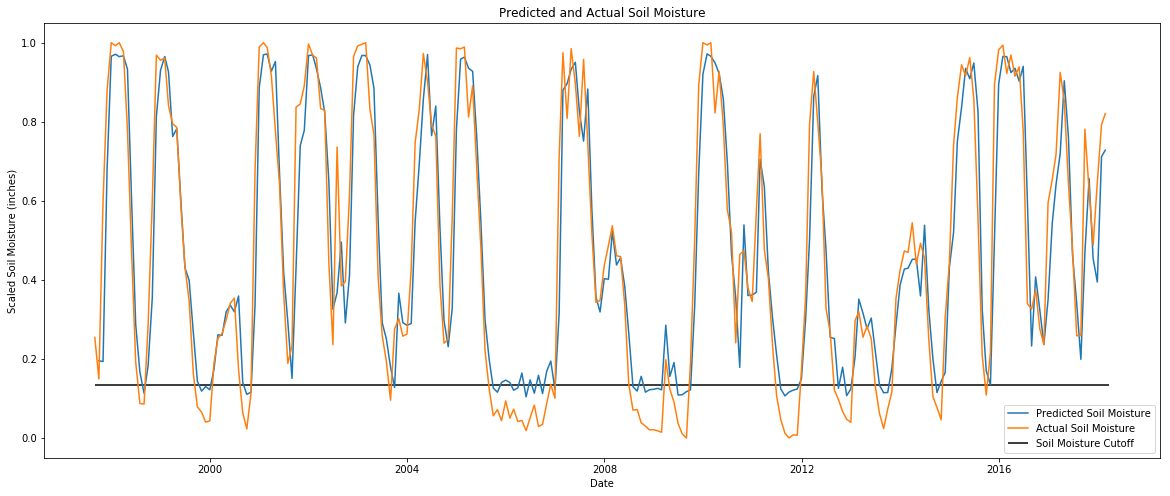

In [105]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=pred_agg_to_plot, label='Predicted Soil Moisture')
sns.lineplot(data=df_monthly.scaled_soil_moisture, label='Actual Soil Moisture')
plt.hlines(y=smscaler.transform(lower_bound_df[['value']]), 
           xmin=datetime.datetime(1997, 8, 31),
           xmax=datetime.datetime(2018, 3, 30),
           label='Soil Moisture Cutoff', color='black')
plt.title('Predicted and Actual Soil Moisture')
plt.xlabel('Date')
plt.ylabel('Scaled Soil Moisture (inches)')
plt.legend()
plt.show()